In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt

# import mnist data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/",one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
# parameters

learning_rate = 0.01
training_epochs = 25
batch_size = 100
display_step = 1

# tf graph input 
x = tf.placeholder(tf.float32,shape=[None,784]) # mnist data image of shape 28*28=784
y = tf.placeholder(tf.float32, [None, 10]) # 0-9 digits recognition => 10 classes

# set model weights
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

# construct model
pred = tf.nn.softmax(tf.matmul(x,W)+b) # softmax

# minimize cost using cross entropy
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred),reduction_indices=1))
# gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)    

init = tf.initialize_all_variables()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Epoch: 0001 cost=  1.183808826
Epoch: 0002 cost=  0.665287552
Epoch: 0003 cost=  0.552758748
Epoch: 0004 cost=  0.498631112
Epoch: 0005 cost=  0.465475685
Epoch: 0006 cost=  0.442511959
Epoch: 0007 cost=  0.425533195
Epoch: 0008 cost=  0.412195704
Epoch: 0009 cost=  0.401395277
Epoch: 0010 cost=  0.392424858
Epoch: 0011 cost=  0.384801776
Epoch: 0012 cost=  0.378174489
Epoch: 0013 cost=  0.372396059
Epoch: 0014 cost=  0.367250434
Epoch: 0015 cost=  0.362701565
Epoch: 0016 cost=  0.358544755
Epoch: 0017 cost=  0.354877333
Epoch: 0018 cost=  0.351424642
Epoch: 0019 cost=  0.348351688
Epoch: 0020 cost=  0.345415458
Epoch: 0021 cost=  0.342713575
Epoch: 0022 cost=  0.340231844
Epoch: 0023 cost=  0.337923540
Epoch: 0024 cost=  0.335750382
Epoch: 0025 cost=  0.333717916
optimization finished
accuracy:  0.8883333


/home/saivinay/.local/lib/python3.5/site-packages/matplotlib/axes/_base.py:380: MatplotlibDeprecationWarning: 
cycling among columns of inputs with non-matching shapes is deprecated.
  cbook.warn_deprecated("2.2", "cycling among columns of inputs "


ValueError: operands could not be broadcast together with shapes (784,10) (100,784) 

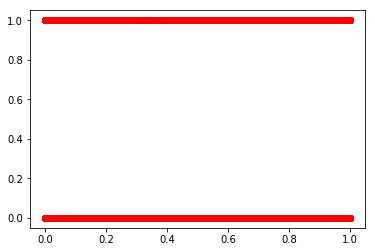

In [3]:
# start training

with tf.Session() as sess:
    sess.run(init)
    
    # training cycle
    
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples/batch_size)
        #Loop over all batches
        for i in range(total_batch):
            batch_x,batch_y = mnist.train.next_batch(batch_size)
            # fit training using batch data
            _,c = sess.run([optimizer,cost],feed_dict = {x:batch_x,y:batch_y})
            
            avg_cost += c/total_batch
            
        # display logs per epoch
        print("Epoch:",'%04d' % (epoch+1), "cost= ","{:.9f}".format(avg_cost))
    
    print("optimization finished")
    
    # testing
    
    correct_prediction = tf.equal(tf.argmax(pred,1),tf.argmax(y,1))
    # calculate accuracy for 3000 samples
    accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
    print("accuracy: ", accuracy.eval({x:mnist.test.images[:3000],y:mnist.test.labels[:3000]}))
    
    # graphic display
    plt.plot(batch_x,batch_y,"ro",label='Original data')
    plt.plot(batch_x,sess.run(W)*batch_x+sess.run(b),label='Fitted Line')
    plt.legend()
    plt.show()
    